DataOps is a set of practices, tools, that aim to improve the speed, quality, and collaboration involved in managing data pipelines and analytics.
It applies DevOps principles (like automation, monitoring, and CI/CD) to data management.

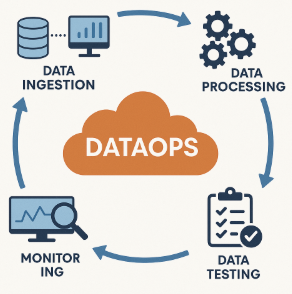

In [5]:
import pandas as pd
import numpy as np

In [6]:
from datetime import datetime

In [15]:

CALL_LOGS_PATH    = '/content/call_logs.csv' # replace with your file path
AGENT_ROSTER_PATH = '/content/agent_roster.csv'
DISPOSITION_PATH  = '/content/disposition_summary.csv'

In [7]:
call_logs_df = pd.read_csv(CALL_LOGS_PATH)
agent_roster_df = pd.read_csv(AGENT_ROSTER_PATH)
disposition_df = pd.read_csv(DISPOSITION_PATH)

In [8]:
call_logs_df

,call_id,agent_id,org_id,installment_id,status,duration,created_ts,call_date
0,C5333,A020,O2,L1826,completed,5.68,2025-04-28T15:40:00,2025-04-28
1,C3045,A018,O1,L1996,no_answer,14.27,2025-04-28T02:41:00,2025-04-28
2,C5803,A018,O1,L1849,failed,11.01,2025-04-28T19:42:00,2025-04-28
3,C2139,A007,O1,L1046,connected,9.02,2025-04-28T09:52:00,2025-04-28
4,C4814,A003,O1,L1887,completed,2.42,2025-04-28T12:58:00,2025-04-28
...,...,...,...,...,...,...,...,...
495,C5508,A010,O3,L1062,connected,5.36,2025-04-28T21:22:00,2025-04-28
496,C9120,A014,O3,L1048,failed,8.80,2025-04-28T21:57:00,2025-04-28
497,C9592,A013,O1,L1326,no_answer,1.26,2025-04-28T13:56:00,2025-04-28
498,C5913,A005,O3,L1385,connected,14.62,2025-04-28T18:21:00,2025-04-28


In [9]:
agent_roster_df

,agent_id,users_first_name,users_last_name,users_office_location,org_id
0,A001,AgentFirst1,AgentLast1,Bangalore,O1
1,A002,AgentFirst2,AgentLast2,Delhi,O1
2,A003,AgentFirst3,AgentLast3,Mumbai,O1
3,A004,AgentFirst4,AgentLast4,Bangalore,O3
4,A005,AgentFirst5,AgentLast5,Bangalore,O3
5,A006,AgentFirst6,AgentLast6,Chennai,O1
6,A007,AgentFirst7,AgentLast7,Bangalore,O1
7,A008,AgentFirst8,AgentLast8,Mumbai,O1
8,A009,AgentFirst9,AgentLast9,Bangalore,O3
9,A010,AgentFirst10,AgentLast10,Mumbai,O3


In [10]:
disposition_df

,agent_id,org_id,call_date,login_time
0,A001,O1,2025-04-28,11:58
1,A002,O1,2025-04-28,10:05
2,A003,O1,2025-04-28,10:24
3,A004,O3,2025-04-28,8:13
4,A005,O3,2025-04-28,NaN
5,A006,O1,2025-04-28,11:29
6,A007,O1,2025-04-28,8:36
7,A008,O1,2025-04-28,9:31
8,A009,O3,2025-04-28,11:46
9,A010,O3,2025-04-28,11:11


# **Task 1 -- Data Ingestion and Validation:**

- Read all 3 files into pandas.
- Ensure call_date, agent_id, and org_id are present and correctly formatted.
- Flag missing or duplicate entries.

In [11]:
## 1. Data Ingestion and Validation --

# reading all 3 files into pandas.

CALL_LOGS_PATH    = '/content/call_logs.csv'
AGENT_ROSTER_PATH = '/content/agent_roster.csv'
DISPOSITION_PATH  = '/content/disposition_summary.csv'

call_logs_df = pd.read_csv(CALL_LOGS_PATH)
agent_roster_df = pd.read_csv(AGENT_ROSTER_PATH)
disposition_df = pd.read_csv(DISPOSITION_PATH)



# Required columns for validation
# REQUIRED_COLUMNS = ['call_date', 'agent_id', 'org_id']

def read_and_validate(filepath, name):


    df = pd.read_csv(filepath)
    errors = []


    # define required columns based on file name
    if name in ['call_logs', 'disposition_summary']:
        required_cols = ['call_date', 'agent_id', 'org_id']
    elif name == 'agent_roster':
        required_cols = ['agent_id', 'org_id']
    else:
        required_cols = []


    # checking required columns
    for col in required_cols:
        if col not in df.columns:
            errors.append(f" Missing column '{col}' in {name} ")


    # convert call_date format if required
    if 'call_date' in df.columns:
        df['call_date'] = pd.to_datetime(df['call_date'], errors = 'coerce') #parameter for handle errors during the conversion.
        if df['call_date'].isna().sum() > 0:   #checks if any invalid date formats were encountered and converted to NaT
            errors.append(f" Invalid date format in 'call_date' in {name} ")


    # flag missing fields
    if required_cols:
        missing = df[required_cols].isna() # checks for missing values (NaN/NaT), result is a new df is missing with the same number of rows as df
        df['missing_fields_flag'] = missing.any(axis=1) # adds new column to the original df,it checks each row if any of the values in the missing
        print(f" {df['missing_fields_flag'].sum()} rows with missing key fields in {name} ")


    # flag duplicates only in call_logs
    if name == 'call_logs':
        df['duplicate_flag'] = df.duplicated(subset=['call_id'], keep = False)# adds new column,tells duplicated() to only check v alues in 'call_id' column to check if row is a duplicate or not,
                                                                              # keep = False controls which of the duplicate row(s) are marked as True
        print(f" {df['duplicate_flag'].sum()} duplicate call_id entries in {name}")


    # displa errors if found
    if errors:
        print("\n".join(errors))
    else:
        print(f" {name} passed column and date checks and required columns are satisfied.\n")

    return df


# run validation check
call_logs = read_and_validate(CALL_LOGS_PATH, 'call_logs')
agent_roster = read_and_validate(AGENT_ROSTER_PATH, 'agent_roster')
disposition = read_and_validate(DISPOSITION_PATH, 'disposition_summary')

 0 rows with missing key fields in call_logs 
 21 duplicate call_id entries in call_logs
 call_logs passed column and date checks and required columns are satisfied.

 0 rows with missing key fields in agent_roster 
 agent_roster passed column and date checks and required columns are satisfied.

 0 rows with missing key fields in disposition_summary 
 disposition_summary passed column and date checks and required columns are satisfied.





---



# **Task 2 -- Join Logic:**

- Merge the datasets using agent_id, org_id, and call_date.
- Ensure no data loss in joins and clearly explain how you handled mismatches.

In [12]:

report_date = '2025-04-28'  # Change as needed

# refers to the specific date for which you're generating the performance summary of agents and calls.
# call_logs.csv has call_date per record and disposition_summary.csv also uses call_date
# so our summary needs to filtered by all records to that date only

In [30]:
def merge_data(call_logs, agent_roster, disposition, report_date):


    print(f'Filtering Data for Report Date: {report_date}')

    # filter only for the report date
    call_logs_filtered   = call_logs[call_logs['call_date'] == report_date].copy()
    disposition_filtered = disposition[disposition['call_date'] == report_date].copy()
    #creates new df called call_logs_filtered that contains only the rows from call_logs where the value in the 'call_date'
    #column is equal to the value of the report_date and copy()
    #ensures that call_logs_filtered is a completely new dataframe, and modifications to it will not affect the original call_logs DataFrame.


    print(f' calls on {report_date}               : {len(call_logs_filtered)}')
    print(f' disposition entries on {report_date} : {len(disposition_filtered)}\n')
    print('\n')

    # merge call_logs with agent_roster using left join to keep all call records
    merged = call_logs_filtered.merge(agent_roster, on = ['agent_id', 'org_id'], how = 'left', indicator ='agent_merge_flag')

    # It performs a left join based on matching agent_id and org_id, so that all call logs for the specified date are kept.
    # the agent_merge_flag column is added to merged help understand
    # which call logs had a corresponding agent record in the agent_roster and which did not.



    print(' Merged(joined) call_logs + agent_roster : ')
    print(merged['agent_merge_flag'].value_counts(), '\n')

    # 'left_only' means call log entry exists for agent and organization,but no matching record in the agent_roster for that combination.
    # 'right_only' means row is present in right DataFrame(agent_roster), but no corresponding call logs for that agent and organization on the report_date.
    #  'both' means the row is present in both DataFrames and the merge was successful based on the specified on columns.


    # merge with disposition to bring login_time using left join to keep all calls
    merged_new = merged.merge(
        disposition_filtered[['agent_id', 'org_id', 'call_date', 'login_time']],
        on=['agent_id', 'org_id', 'call_date'],
        how='left',
        indicator='disposition_merge_flag')
    # merged DataFrame (call logs,agent info) is joined with the login_time information from the disposition_filtered DataFrame,
    # on matching agent_id, org_id, and call_date. The disposition_merge_flag column helps in how many call logs have corresponding
    # disposition records based on these criteria.



    print(' final merged with disposition_summary : ')
    print(merged_new['disposition_merge_flag'].value_counts(), '\n')
    print('\n')
    # 'left_only' means call log entry exists for agent and organization,but no matching record in the agent_roster for that combination.
    # 'right_only' means row is present in right DataFrame(agent_roster), but no corresponding call logs for that agent and organization on the report_date.
    #  'both' means the row is present in both DataFrames and the merge was successful based on the specified on columns.



    # validation summary
    unmatched_agents      = merged_new['agent_merge_flag'].value_counts().get('left_only', 0)
    unmatched_disposition = merged_new['disposition_merge_flag'].value_counts().get('left_only', 0)
    print('\n')

    # unmatched_agents counts number of call logs on the report_date that are not matched with agent in the agent_roster based on agent_id and org_id.
    # unmatched_disposition counts number of call logs on the report_date that are not matched with disposition record based on agent_id, org_id, and call_date.

    print('\n')
    if unmatched_agents > 0:
        print(f' {unmatched_agents} call rows had no matching agent in agent_roster')
    if unmatched_disposition > 0:
        print(f' {unmatched_disposition} call rows had no matching login entry in disposition_summary')


    return merged_new


In [59]:
report_date = pd.to_datetime('2025-04-28')

# Merge datasets for the report date
print('\n')
merged_df = merge_data(call_logs, agent_roster, disposition, report_date)



Filtering Data for Report Date: 2025-04-28 00:00:00
 calls on 2025-04-28 00:00:00               : 500
 disposition entries on 2025-04-28 00:00:00 : 20



 Merged(joined) call_logs + agent_roster : 
agent_merge_flag
both          500
left_only       0
right_only      0
Name: count, dtype: int64 

 final merged with disposition_summary : 
disposition_merge_flag
both          500
left_only       0
right_only      0
Name: count, dtype: int64 









1. 500 call log entries are recorded for that report_date ('2025-04-28').

2. 20 disposition records (agent logins) exist for that same date.

3. All 500 call records matched successfully with agent_roster based on agent_id and org_id and No call records were missing agent metadata.

4. All 500 call records also found a match in disposition_summary (including call_date) such that all agents in the call logs had a login recorded.

**Hence, joins are successful and no rows were lost or left unmatched.**



---



# **Task 3 -- Feature Engineering:**

For each agent on each date, compute:
* Total Calls Made
* Unique Loans Contacted
* Connect Rate = Completed Calls / Total Calls
* Average Call Duration (in minutes)
* Presence (1 if login_time exists, else 0)

In [36]:
def compute_agent_daily_metrics(merged_df):


    # normalize time duration to minutes
    merged_df['duration_min'] = merged_df['duration'] / 60
    # creates a new column 'duration_min' in merged_df, It calculates the value for this new column by taking
    # values from existing column named 'duration' and divids each of them by 60 to convert the time duration into minutes.



    # connected call/completed call
    merged_df['is_connected'] = merged_df['status'].str.lower().eq('completed').astype(int)
    # creates new column 'is_connected' in merged_df. checks if the values in the 'status' column (converted to lowercase) are exactly equal to 'completed'.
    # If true, it assigns 1 to the 'is_connected' column for that row else assigns 0.
    # it flags whether a call was completed (1) or not (0).



    # Presence -- binary flag if login_time is not null
    merged_df['presence'] = merged_df['login_time'].notna().astype(int)
    #  adds new column 'presence' to the merged_df, checks if 'login_time' column has a non-missing value (notna()).
    # if 'login_time' is not null for a row, the 'presence' column gets a value of 1
    # if 'login_time' is null, it gets 0 value. flags whether a login time was recorded for a call or not


    # Grouping rows of the merged_df based on the unique combinations of values in the specified columns
    summary = merged_df.groupby(['agent_id', 'call_date', 'users_first_name', 'users_last_name', 'users_office_location']).agg(
        # agg() is called on the DataFrameGroupBy object to perform aggregation on the grouped data to calculate summary statistics for each group.


        total_calls = ('call_id', 'count'), # defines how to calculate the total number of calls for each group.
        # total_calls is new column takes values from 'call_id' column from the grouped data is used for the aggregation
        # 'count' is the aggregation function to count the number of non-null values in the 'call_id' column for each group


        unique_loans_contacted = ('installment_id', 'nunique'), # finds number of unique loans contacted by agent within each group.
        # unique_loans_contacted is the name of the new column for the count of unique loans.
        # 'installment_id' is column having loan identifiers.
        #'nunique' aggregation function to count the number of unique values in the 'installment_id' column for each group.


        completed_calls = ('is_connected', 'sum'), # calculates the total number of completed calls for each group.
        # completed_calls is name of the new column for the count of completed calls.
        # 'is_connected' is the binary flag column (1 for completed, 0 for not completed).
        # 'sum' aggregation function that sums the values in the 'is_connected' column for each group. it is binary so sum gives the count of completed calls.



        average_call_duration_min = ('duration_min', 'mean'), # calculates average call duration in minutes for each group
        # average_call_duration_min is the new column for the average duration.
        # 'duration_min' is the column having the call duration in minutes (calculated previously).
        # 'mean' aggregation function calculates the average (mean) of the values in the 'duration_min' column for each group.


        presence = ('presence', 'max')  # checks if the agent was present (non-null login_time) at any point within each group.
        # 'max' aggregation fn finds maximum value in the 'presence' column for each group.
        # values are 0 or 1, if the agent was present even once within the calls belonging to that group,
        # maximum value = 1. If the agent was never present (all presence values are 0), the maximum = 0.


    ).reset_index()
    # After performing groupby() and agg(), grouping columns ('agent_id', 'call_date', etc)
    # become the index of the resulting DataFrame (summary) so reset_index() converts index columns back
    # to regular columns of the DataFrame, making it easier to work with.



    summary['connect_rate'] = round( summary['completed_calls'] / summary['total_calls'], 2) # compute Connect Rate =  Completed Calls / Total Calls
    summary['average_call_duration_min'] = round(summary['average_call_duration_min'], 2) # compute average call duration in minutes roundoff to 2 digits

    return summary


In [42]:
agent_summary_df = compute_agent_daily_metrics(merged_df)

agent_summary_df.head()

,agent_id,call_date,users_first_name,users_last_name,users_office_location,total_calls,unique_loans_contacted,completed_calls,average_call_duration_min,presence,connect_rate
0,A001,2025-04-28,AgentFirst1,AgentLast1,Bangalore,20,20,2,0.11,1,0.10
1,A002,2025-04-28,AgentFirst2,AgentLast2,Delhi,23,23,3,0.13,1,0.13
2,A003,2025-04-28,AgentFirst3,AgentLast3,Mumbai,21,21,8,0.12,1,0.38
3,A004,2025-04-28,AgentFirst4,AgentLast4,Bangalore,27,27,4,0.13,1,0.15
4,A005,2025-04-28,AgentFirst5,AgentLast5,Bangalore,29,28,4,0.12,0,0.14


In [41]:
agent_summary_df

,agent_id,call_date,users_first_name,users_last_name,users_office_location,total_calls,unique_loans_contacted,completed_calls,average_call_duration_min,presence,connect_rate
0,A001,2025-04-28,AgentFirst1,AgentLast1,Bangalore,20,20,2,0.11,1,0.10
1,A002,2025-04-28,AgentFirst2,AgentLast2,Delhi,23,23,3,0.13,1,0.13
2,A003,2025-04-28,AgentFirst3,AgentLast3,Mumbai,21,21,8,0.12,1,0.38
3,A004,2025-04-28,AgentFirst4,AgentLast4,Bangalore,27,27,4,0.13,1,0.15
4,A005,2025-04-28,AgentFirst5,AgentLast5,Bangalore,29,28,4,0.12,0,0.14
5,A006,2025-04-28,AgentFirst6,AgentLast6,Chennai,16,16,2,0.15,1,0.12
6,A007,2025-04-28,AgentFirst7,AgentLast7,Bangalore,24,23,5,0.12,1,0.21
7,A008,2025-04-28,AgentFirst8,AgentLast8,Mumbai,29,29,8,0.11,1,0.28
8,A009,2025-04-28,AgentFirst9,AgentLast9,Bangalore,26,25,7,0.12,1,0.27
9,A010,2025-04-28,AgentFirst10,AgentLast10,Mumbai,38,38,7,0.13,1,0.18


# OBSERVATIONS --

1. most of agents were present (presence = 1).

2. The connect_rate is low across the board, ranging from 10% to 38%, suggesting most calls did not connect or did not marked as completed.

3. Call durations are very short (6 to 8 seconds), which might mean small interactions or hang ups.

4. Agent A003 had the highest connect_rate (0.38) and completed 8 out of 21 calls

5. Agents A001 and A017 have the least connect_rate (0.10) and completed 2 out of 20 calls

6. Agent A014 has completed highest call of 10 out of 30 with connect_rate of 33%



---



# **Task 4 -- Output :**

In [44]:
agent_summary_df.to_csv('agent_performance_summary.csv', index=False)

In [46]:
summary = agent_summary_df.copy()

In [47]:
summary

,agent_id,call_date,users_first_name,users_last_name,users_office_location,total_calls,unique_loans_contacted,completed_calls,average_call_duration_min,presence,connect_rate
0,A001,2025-04-28,AgentFirst1,AgentLast1,Bangalore,20,20,2,0.11,1,0.10
1,A002,2025-04-28,AgentFirst2,AgentLast2,Delhi,23,23,3,0.13,1,0.13
2,A003,2025-04-28,AgentFirst3,AgentLast3,Mumbai,21,21,8,0.12,1,0.38
3,A004,2025-04-28,AgentFirst4,AgentLast4,Bangalore,27,27,4,0.13,1,0.15
4,A005,2025-04-28,AgentFirst5,AgentLast5,Bangalore,29,28,4,0.12,0,0.14
5,A006,2025-04-28,AgentFirst6,AgentLast6,Chennai,16,16,2,0.15,1,0.12
6,A007,2025-04-28,AgentFirst7,AgentLast7,Bangalore,24,23,5,0.12,1,0.21
7,A008,2025-04-28,AgentFirst8,AgentLast8,Mumbai,29,29,8,0.11,1,0.28
8,A009,2025-04-28,AgentFirst9,AgentLast9,Bangalore,26,25,7,0.12,1,0.27
9,A010,2025-04-28,AgentFirst10,AgentLast10,Mumbai,38,38,7,0.13,1,0.18


In [61]:
# Convert connect_rate to percentage
summary['connect_rate_percent'] = (summary['connect_rate'] * 100).round(0)

# Identify top performer
top_agent = summary.loc[summary['connect_rate'].idxmax()]
top_performer_name = f"{top_agent['users_first_name']} {top_agent['users_last_name']}"
top_performer_rate = int(top_agent['connect_rate_percent'])

#  total active agents (presence == 1)
total_active_agents = summary['presence'].sum()

#  average call duration in minutes
average_duration_min = round(summary['average_call_duration_min'].mean() * 60, 1)  # convert to minutes

# slackstyle message to show the observations
message = (
    f" Agent Summary for the date {summary['call_date'].iloc[0]} -- \n"
    f" 1. Top Performer       :  {top_performer_name} with ({top_performer_rate}% - connect rate)\n"
    f" 2. Total Active Agents :  {total_active_agents}\n"
    f" 3. Average Duration    :  {average_duration_min} min"
)

print(message)

 Agent Summary for the date 2025-04-28 00:00:00 -- 
 1. Top Performer       :  AgentFirst3 AgentLast3 with (38% - connect rate)
 2. Total Active Agents :  17
 3. Average Duration    :  7.5 min


In [54]:
total_calls_all = agent_summary_df['total_calls'].sum()

total_completed_calls = agent_summary_df['completed_calls'].sum()

overall_connect_rate = round(total_completed_calls / total_calls_all * 100, 1)

total_unique_loans = agent_summary_df['unique_loans_contacted'].sum()

In [60]:
message1 = (
    f" More insights from Agent Summary for {agent_summary_df['call_date'].iloc[0]} --\n"
    f" 1. Total Active Agents   : {total_active_agents}\n"
    f" 2. Total Calls           : {total_calls_all}\n"
    f" 3. Completed Calls       : {total_completed_calls}\n"
    f" 4. Overall Connect Rate  : {overall_connect_rate}%\n"
    f" 5. Unique Loans Contacted: {total_unique_loans}\n"
)

print(message1)

 More insights from Agent Summary for 2025-04-28 00:00:00 --
 1. Total Active Agents   : 17
 2. Total Calls           : 500
 3. Completed Calls       : 103
 4. Overall Connect Rate  : 20.6%
 5. Unique Loans Contacted: 494





---



In [62]:
   # --------- End-to-End Data ETL Pipeline ---------

def agent_performance_pipeline(call_logs, agent_roster, disposition, report_date, output_path='agent_performance_summary.csv'):

    ### -------- TASK 1 & 2: Merge Logic -------- ###
    print(f'\nFiltering Data for Report Date: {report_date}')

    call_logs_filtered   = call_logs[call_logs['call_date'] == report_date].copy()
    disposition_filtered = disposition[disposition['call_date'] == report_date].copy()

    print(f' calls on {report_date}               : {len(call_logs_filtered)}')
    print(f' disposition entries on {report_date} : {len(disposition_filtered)}\n')

    # Merge call logs with agent roster
    merged = call_logs_filtered.merge(agent_roster, on=['agent_id', 'org_id'], how='left', indicator='agent_merge_flag')
    print(' Merged call_logs + agent_roster:')
    print(merged['agent_merge_flag'].value_counts(), '\n')

    # Merge with disposition to bring login_time
    merged = merged.merge(
        disposition_filtered[['agent_id', 'org_id', 'call_date', 'login_time']],
        on=['agent_id', 'org_id', 'call_date'],
        how='left',
        indicator='disposition_merge_flag'
    )
    print(' Final merged with disposition:')
    print(merged['disposition_merge_flag'].value_counts(), '\n')


    ### -------- TASK 3: Feature Engineering -------- ###

    merged['duration_min'] = merged['duration'] / 60
    merged['is_connected'] = merged['status'].str.lower().eq('completed').astype(int)
    merged['presence'] = merged['login_time'].notna().astype(int)

    agent_summary_df = merged.groupby(
        ['agent_id', 'call_date', 'users_first_name', 'users_last_name', 'users_office_location']
    ).agg(
        total_calls=('call_id', 'count'),
        unique_loans_contacted=('installment_id', 'nunique'),
        completed_calls=('is_connected', 'sum'),
        avg_duration_min=('duration_min', 'mean'),
        presence=('presence', 'max')
    ).reset_index()

    agent_summary_df['connect_rate'] = round(agent_summary_df['completed_calls'] / agent_summary_df['total_calls'], 2)
    agent_summary_df['avg_duration_min'] = round(agent_summary_df['avg_duration_min'], 2)


    ### -------- TASK 4: Save + Slack Message Summary -------- ###

    agent_summary_df.to_csv(output_path, index=False)
    print(f'\n✅ Saved agent performance summary to: {output_path}')

    # Slack Message Formatting
    top_agent = agent_summary_df.sort_values(by='connect_rate', ascending=False).iloc[0]
    total_active_agents = agent_summary_df['agent_id'].nunique()
    avg_duration = round(agent_summary_df['avg_duration_min'].mean(), 2)
    avg_connect_rate = round(agent_summary_df['connect_rate'].mean() * 100, 2)

    slack_message = f"""
📊 *Agent Summary for {report_date}*
🏆 Top Performer: {top_agent['users_first_name']} {top_agent['users_last_name']} ({int(top_agent['connect_rate']*100)}% connect rate)
👥 Total Active Agents: {total_active_agents}
⏱️ Avg Call Duration: {avg_duration} min
📞 Avg Connect Rate: {avg_connect_rate}%
    """.strip()

    print('\n--- Slack Summary ---')
    print(slack_message)

    return agent_summary_df, slack_message


In [63]:
# Example call
final_df, slack_summary = agent_performance_pipeline(call_logs, agent_roster, disposition, report_date='2025-04-28')



Filtering Data for Report Date: 2025-04-28
 calls on 2025-04-28               : 500
 disposition entries on 2025-04-28 : 20

 Merged call_logs + agent_roster:
agent_merge_flag
both          500
left_only       0
right_only      0
Name: count, dtype: int64 

 Final merged with disposition:
disposition_merge_flag
both          500
left_only       0
right_only      0
Name: count, dtype: int64 


✅ Saved agent performance summary to: agent_performance_summary.csv

--- Slack Summary ---
📊 *Agent Summary for 2025-04-28*
🏆 Top Performer: AgentFirst3 AgentLast3 (38% connect rate)
👥 Total Active Agents: 20
⏱️ Avg Call Duration: 0.12 min
📞 Avg Connect Rate: 20.45%
